# Context

https://www.kaggle.com/blurredmachine/employee-burn-rate-analysis-eda-viz-pred

https://www.kaggle.com/blurredmachine/are-your-employees-burning-out

Understanding what will be the Burn Rate for the employee working in an organization based on the current pandemic situation where work from home is a boon and a bane. How are employees' Burn Rate affected based on various conditions provided?

- But, What is Burn Out as a psychological diagnose? 

Burnout refers to a state of severe emotional, physical and mental exhaustion in which a person collapses as a result of mental fatigue or stress arising from social interaction and routine work.
Normally the people who suffer it feel that they cannot give more of themselves, they feel overwhelmed, that they are exhausted and that their emotional resources are depleted. This syndrome affects a large number of workers and now the World Health Organization has included it for the first time in its list of diseases.

According to an anonymous survey, about 450 million people live with mental disorders that can be one of the primary causes of poor health and disability worldwide. These days when the world is suffering from a pandemic situation, it becomes really hard to maintain mental fitness.

# Content


- Employee ID: The unique ID allocated for each employee (example: fffe390032003000)

- Date of Joining: The date-time when the employee has joined the organization (example: 2008-12-30)

- Gender: The gender of the employee (Male/Female)

- Company Type: The type of company where the employee is working (Service/Product)

- WFH Setup Available: Is the work from home facility available for the employee (Yes/No)

- Designation: The designation of the employee of work in the organization.
In the range of [0.0, 5.0] bigger is higher designation.

- Resource Allocation: The amount of resource allocated to the employee to work, ie. number of working hours.
In the range of [1.0, 10.0] (higher means more resource).

- Mental Fatigue Score: The level of fatigue mentally the employee is facing.
In the range of [0.0, 10.0] where 0.0 means no fatigue and 10.0 means completely fatigue.

- Burn Rate: The value we need to predict for each employee telling the rate of Bur out while working.
In the range of [0.0, 1.0] where the higher the value is more is the burn out.



><b>Acknowledgements</b>
A special thanks to the HackerEarth Competition on the topic "HackerEarth Machine Learning Challenge: Are your employees burning out? which can be accessed here for this data collection.

><b>Inspiration</b>
Try to build some really amazing predictions keeping in mind that happy and healthy employees are indisputably more productive at work, and in turn, help the business flourish profoundly.


# libraries & datasets

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from warnings import simplefilter
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

import warnings

%matplotlib inline


warnings.filterwarnings("ignore")
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")


In [2]:
import sys
sys.path.insert(0, '/Users/dpagniez/Desktop/Functions')

from functions_plot_EDA import *

In [3]:
import sys
sys.path.insert(0, '/Users/dpagniez/Desktop/Functions')

from My_functions_EDA import *

In [4]:
sample = pd.read_csv('../datasets/sample_submission.csv')

In [5]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Employee ID  5 non-null      object 
 1   Burn Rate    5 non-null      float64
dtypes: float64(1), object(1)
memory usage: 208.0+ bytes


In [6]:
train = pd.read_csv('../datasets/train.csv')

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           22750 non-null  object 
 1   Date of Joining       22750 non-null  object 
 2   Gender                22750 non-null  object 
 3   Company Type          22750 non-null  object 
 4   WFH Setup Available   22750 non-null  object 
 5   Designation           22750 non-null  float64
 6   Resource Allocation   21369 non-null  float64
 7   Mental Fatigue Score  20633 non-null  float64
 8   Burn Rate             21626 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.6+ MB


In [8]:
test= pd.read_csv('../datasets/test.csv')

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12250 entries, 0 to 12249
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           12250 non-null  object 
 1   Date of Joining       12250 non-null  object 
 2   Gender                12250 non-null  object 
 3   Company Type          12250 non-null  object 
 4   WFH Setup Available   12250 non-null  object 
 5   Designation           12250 non-null  float64
 6   Resource Allocation   12250 non-null  float64
 7   Mental Fatigue Score  12250 non-null  float64
dtypes: float64(3), object(5)
memory usage: 765.8+ KB


- We will do the assumption to start to work and try our ML model JUST with the Train dataset

# Train dataset (EDA & Data Cleaning)

In [10]:
percentage_nullValues(train)

,Percentage_NaN
Mental Fatigue Score,9.3
Resource Allocation,6.1
Burn Rate,4.9
Employee ID,0.0
Date of Joining,0.0
Gender,0.0
Company Type,0.0
WFH Setup Available,0.0
Designation,0.0


In [11]:
Data_train = train.copy().dropna()

In [12]:
percentage_nullValues(Data_train)

,Percentage_NaN
Employee ID,0.0
Date of Joining,0.0
Gender,0.0
Company Type,0.0
WFH Setup Available,0.0
Designation,0.0
Resource Allocation,0.0
Mental Fatigue Score,0.0
Burn Rate,0.0


In [13]:
Data_train.duplicated().sum()


0

In [14]:
#to see only 2 decimals on the description
pd.set_option("display.float_format", "{:.2f}".format)
Data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Designation,18590.00,2.18,1.13,0.00,1.00,2.00,3.00,5.00
Resource Allocation,18590.00,4.49,2.04,1.00,3.00,4.00,6.00,10.00
Mental Fatigue Score,18590.00,5.73,1.92,0.00,4.60,5.90,7.10,10.00
Burn Rate,18590.00,0.45,0.20,0.00,0.32,0.45,0.59,1.00


In [15]:
Data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18590 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           18590 non-null  object 
 1   Date of Joining       18590 non-null  object 
 2   Gender                18590 non-null  object 
 3   Company Type          18590 non-null  object 
 4   WFH Setup Available   18590 non-null  object 
 5   Designation           18590 non-null  float64
 6   Resource Allocation   18590 non-null  float64
 7   Mental Fatigue Score  18590 non-null  float64
 8   Burn Rate             18590 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.4+ MB


In [16]:
percentage_nullValues(test)

,Percentage_NaN
Employee ID,0.00
Date of Joining,0.00
Gender,0.00
Company Type,0.00
WFH Setup Available,0.00
Designation,0.00
Resource Allocation,0.00
Mental Fatigue Score,0.00


## Categorical variables

In [17]:
find_categorical_uniques(Data_train)

Gender : ['Female' 'Male']

Company Type : ['Service' 'Product']

WFH Setup Available : ['No' 'Yes']



['Gender', 'Company Type', 'WFH Setup Available']

In [19]:
find_categorical_uniques(test)

Gender : ['Female' 'Male']

Company Type : ['Service' 'Product']

WFH Setup Available : ['No' 'Yes']



['Gender', 'Company Type', 'WFH Setup Available']

### Employee ID

In [20]:
Data_train = Data_train.drop('Employee ID',
  axis=1)

In [21]:
Data_train.head()

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,2008-09-30,Female,Service,No,2.00,3.00,3.80,0.16
1,2008-11-30,Male,Service,Yes,1.00,2.00,5.00,0.36
3,2008-11-03,Male,Service,Yes,1.00,1.00,2.60,0.20
4,2008-07-24,Female,Service,No,3.00,7.00,6.90,0.52
5,2008-11-26,Male,Product,Yes,2.00,4.00,3.60,0.29


In [22]:
Data_test = test.copy()
Data_test = Data_test.drop('Employee ID',axis=1)

### Gender

In [23]:
Data_train.Gender.value_counts()

Female    9747
Male      8843
Name: Gender, dtype: int64

In [24]:
Data_test.Gender.value_counts()

Female    6445
Male      5805
Name: Gender, dtype: int64

In [25]:
cat_gender =['Female','Male']
newcat_gender =['0','1']    
    
Data_train.Gender.replace(cat_gender,newcat_gender,inplace=True)

In [26]:
Data_test.Gender.replace(cat_gender,newcat_gender,inplace=True)

In [28]:
Data_train.Gender.value_counts()


0    9747
1    8843
Name: Gender, dtype: int64

In [29]:
gndr_ = Data_train.groupby('Gender').mean()
gndr_.T

Gender,0,1
Designation,2.06,2.31
Resource Allocation,4.21,4.79
Mental Fatigue Score,5.47,6.03
Burn Rate,0.42,0.48


In [43]:
Data_train.Gender=Data_train.Gender.astype('int')
Data_test.Gender=Data_test.Gender.astype('int')

### Company Type

In [31]:
Data_train['Company Type'].value_counts()

Service    12174
Product     6416
Name: Company Type, dtype: int64

In [32]:
Data_test['Company Type'].value_counts()

Service    8004
Product    4246
Name: Company Type, dtype: int64

In [33]:
ctype_ = Data_train.groupby('Company Type').mean()
ctype_.T

Company Type,Product,Service
Gender,0.48,0.47
Designation,2.17,2.19
Resource Allocation,4.47,4.50
Mental Fatigue Score,5.72,5.74
Burn Rate,0.45,0.45


In [34]:
cat_ctype =['Service','Product']
newcat_ctype =['1','2']    
    
Data_train['Company Type'].replace(cat_ctype,newcat_ctype,inplace=True)

In [35]:
Data_test['Company Type'].replace(cat_ctype,newcat_ctype,inplace=True)

In [37]:
Data_test['Company Type'].value_counts()

1    8004
2    4246
Name: Company Type, dtype: int64

Umbalanced data if we consider the company type, 1/3 are Product and 2/3 are Service

In [38]:
Data_train['Company Type']=Data_train['Company Type'].astype('int')

In [39]:
Data_test['Company Type']=Data_test['Company Type'].astype('int')

### WFH Setup Available

In [44]:
Data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12250 entries, 0 to 12249
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date of Joining       12250 non-null  object 
 1   Gender                12250 non-null  int64  
 2   Company Type          12250 non-null  int64  
 3   WFH Setup Available   12250 non-null  object 
 4   Designation           12250 non-null  float64
 5   Resource Allocation   12250 non-null  float64
 6   Mental Fatigue Score  12250 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 670.0+ KB


In [45]:
Data_train['WFH Setup Available'].value_counts()

Yes    10030
No      8560
Name: WFH Setup Available, dtype: int64

In [46]:
Data_test['WFH Setup Available'].value_counts()

Yes    6638
No     5612
Name: WFH Setup Available, dtype: int64

In [47]:
remote_ = Data_train.groupby('WFH Setup Available').mean()
remote_.T

WFH Setup Available,No,Yes
Gender,0.52,0.44
Company Type,1.34,1.35
Designation,2.46,1.94
Resource Allocation,5.12,3.95
Mental Fatigue Score,6.31,5.24
Burn Rate,0.52,0.40


WFH demands less resources allocated, is commonly used in highest positions, generates less mental fatigue and have a less burn rate. 

In [48]:
cat_WFH =['No','Yes']
newcat_WFH =['0','1']    
    
Data_train['WFH Setup Available'].replace(cat_WFH,newcat_WFH,inplace=True)
Data_test['WFH Setup Available'].replace(cat_WFH,newcat_WFH,inplace=True)

In [49]:
Data_test['WFH Setup Available'].value_counts()

1    6638
0    5612
Name: WFH Setup Available, dtype: int64

Almost balanced data data if we consider the work from home disponibility. 

In [50]:
Data_train['WFH Setup Available']=Data_train['WFH Setup Available'].astype('int')
Data_test['WFH Setup Available']=Data_test['WFH Setup Available'].astype('int')

In [51]:
Data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12250 entries, 0 to 12249
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date of Joining       12250 non-null  object 
 1   Gender                12250 non-null  int64  
 2   Company Type          12250 non-null  int64  
 3   WFH Setup Available   12250 non-null  int64  
 4   Designation           12250 non-null  float64
 5   Resource Allocation   12250 non-null  float64
 6   Mental Fatigue Score  12250 non-null  float64
dtypes: float64(3), int64(3), object(1)
memory usage: 670.0+ KB


## Numerical variables

array([[<AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'Company Type'}>,
        <AxesSubplot:title={'center':'WFH Setup Available'}>],
       [<AxesSubplot:title={'center':'Designation'}>,
        <AxesSubplot:title={'center':'Resource Allocation'}>,
        <AxesSubplot:title={'center':'Mental Fatigue Score'}>],
       [<AxesSubplot:title={'center':'Burn Rate'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

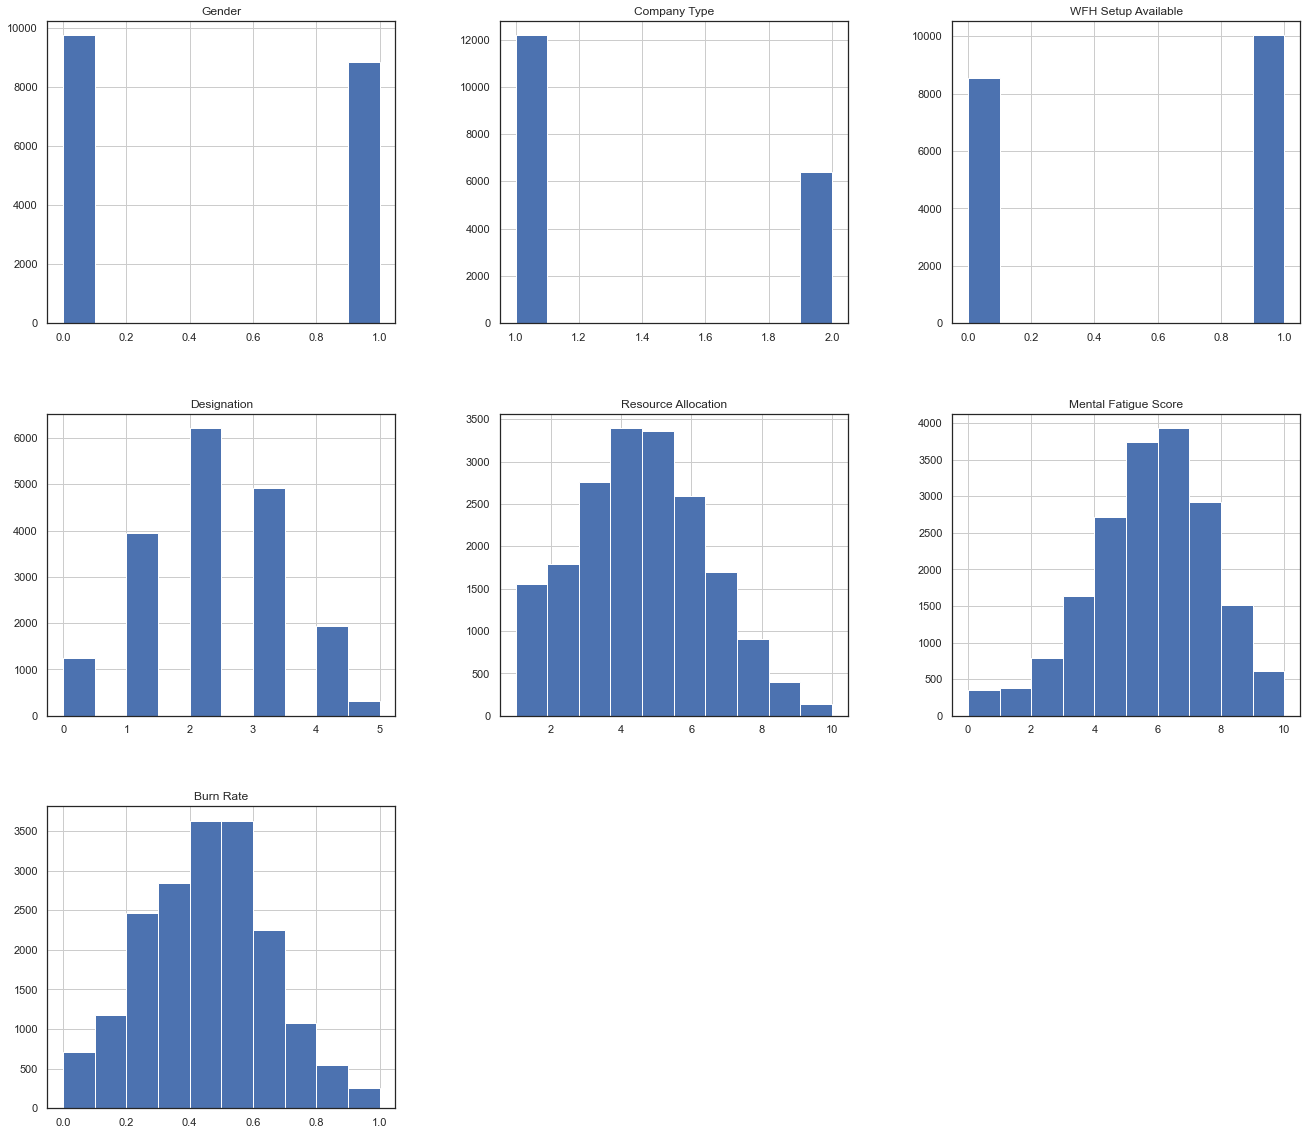

In [52]:
Data_train.hist(edgecolor='white', figsize=(20, 20))

array([[<AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'Company Type'}>],
       [<AxesSubplot:title={'center':'WFH Setup Available'}>,
        <AxesSubplot:title={'center':'Designation'}>],
       [<AxesSubplot:title={'center':'Resource Allocation'}>,
        <AxesSubplot:title={'center':'Mental Fatigue Score'}>]],
      dtype=object)

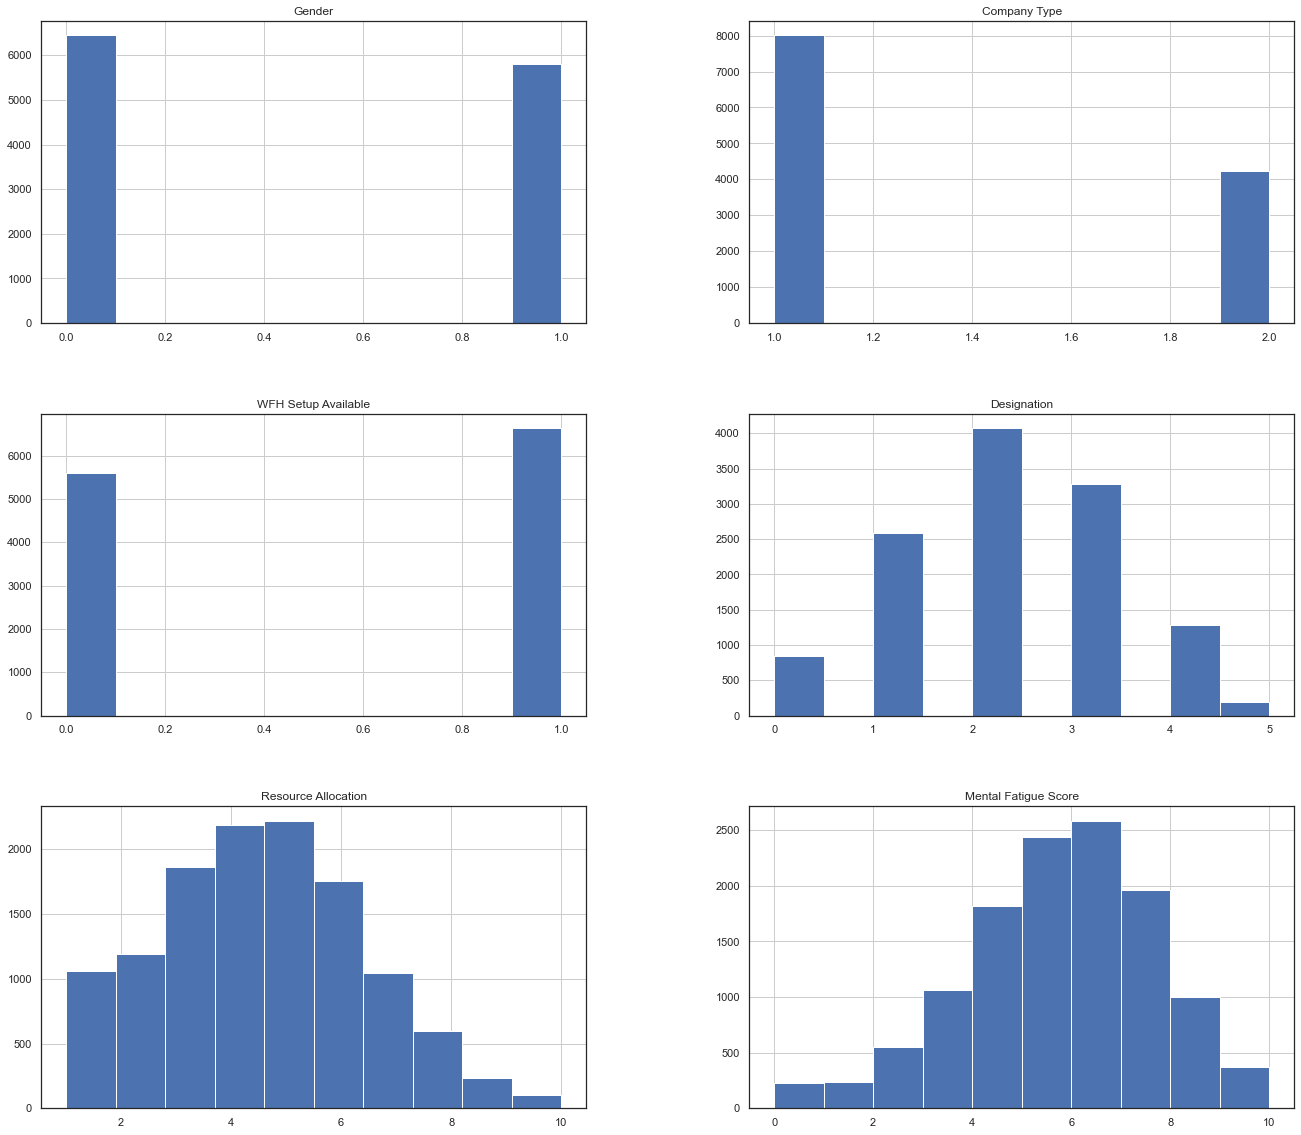

In [53]:
Data_test.hist(edgecolor='white', figsize=(20, 20))

### Date of Joining

In [55]:
from datetime import datetime

In [56]:
Data_train['Date of Joining']=pd.to_datetime(Data_train['Date of Joining'])
Data_test['Date of Joining']=pd.to_datetime(Data_test['Date of Joining'])

In [57]:
current_date = pd.to_datetime('today')

In [58]:
def create_days_count(data):
    return (current_date - data["Date of Joining"])

Data_train["days_count"] = Data_train.apply(create_days_count, axis=1)
Data_train["days_count"] = Data_train["days_count"].dt.days

Data_test['days_count'] = Data_test.apply(create_days_count,axis=1)
Data_test['days_count'] = Data_test['days_count'].dt.days

In [59]:
Data_test.head(20)

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,days_count
0,2008-12-10,0,1,0,2.00,5.00,7.70,4541
1,2008-08-14,0,2,1,1.00,2.00,5.20,4659
2,2008-11-13,1,2,1,1.00,3.00,5.90,4568
3,2008-02-07,0,1,0,3.00,6.00,4.60,4848
4,2008-07-17,0,2,0,2.00,5.00,6.40,4687
5,2008-09-19,1,2,0,3.00,5.00,6.50,4623
6,2008-01-16,0,1,1,2.00,3.00,4.70,4870
7,2008-02-10,1,1,0,2.00,5.00,8.50,4845
8,2008-08-10,1,2,1,2.00,5.00,7.60,4663
9,2008-05-20,1,2,1,2.00,5.00,5.70,4745


In [60]:
Data_train = Data_train.drop('Date of Joining',axis=1)
Data_test = Data_test.drop('Date of Joining',axis=1)

In [62]:
Data_test

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,days_count
0,0,1,0,2.00,5.00,7.70,4541
1,0,2,1,1.00,2.00,5.20,4659
2,1,2,1,1.00,3.00,5.90,4568
3,0,1,0,3.00,6.00,4.60,4848
4,0,2,0,2.00,5.00,6.40,4687
...,...,...,...,...,...,...,...
12245,0,1,1,1.00,2.00,6.10,4610
12246,0,2,1,2.00,4.00,5.90,4795
12247,1,1,0,4.00,7.00,9.60,4843
12248,1,1,0,3.00,6.00,6.70,4849


### Designation

In [63]:
Data_train.Designation.value_counts()

2.00    6214
3.00    4920
1.00    3954
4.00    1947
0.00    1238
5.00     317
Name: Designation, dtype: int64

In [64]:
plotHist(Data_train,'Designation')

In [66]:
plotHist(Data_test,'Designation')

### Resource Allocation

In [67]:
Data_train['Resource Allocation'].value_counts()

4.00     3396
5.00     3364
3.00     2761
6.00     2590
2.00     1794
7.00     1697
1.00     1551
8.00      907
9.00      396
10.00     134
Name: Resource Allocation, dtype: int64

In [68]:
plotHist(Data_train,'Resource Allocation')

In [69]:
plotHist(Data_test,'Resource Allocation')

### Mental Fatigue Score

In [70]:
Data_train['Mental Fatigue Score'].value_counts()

6.00    429
5.90    413
6.30    410
6.10    406
5.80    406
       ... 
0.60     20
0.20     20
0.40     15
0.10     13
0.30     11
Name: Mental Fatigue Score, Length: 101, dtype: int64

In [72]:
plotHist(Data_train,'Mental Fatigue Score')

In [73]:
plotHist(Data_test,'Mental Fatigue Score')

In [ ]:
Data_train['Mental Fatigue Score'].nunique()

### Burn Rate

In [74]:
Data_train['Burn Rate'].value_counts()

0.47    416
0.43    382
0.45    379
0.50    369
0.41    365
       ... 
0.98     17
0.95     16
0.97     11
0.96     10
0.99      8
Name: Burn Rate, Length: 101, dtype: int64

Basic information from your dataset
 ---------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 18590 entries, 0 to 22749
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                18590 non-null  int64  
 1   Company Type          18590 non-null  int64  
 2   WFH Setup Available   18590 non-null  int64  
 3   Designation           18590 non-null  float64
 4   Resource Allocation   18590 non-null  float64
 5   Mental Fatigue Score  18590 non-null  float64
 6   Burn Rate             18590 non-null  float64
 7   days_count            18590 non-null  int64  
dtypes: float64(4), int64(4)
memory usage: 1.3 MB
Numerical variables are:
 Index(['Gender', 'Company Type', 'WFH Setup Available', 'Designation',
       'Resource Allocation', 'Mental Fatigue Score', 'Burn Rate',
       'days_count'],
      dtype='object')
-----------------------------------------

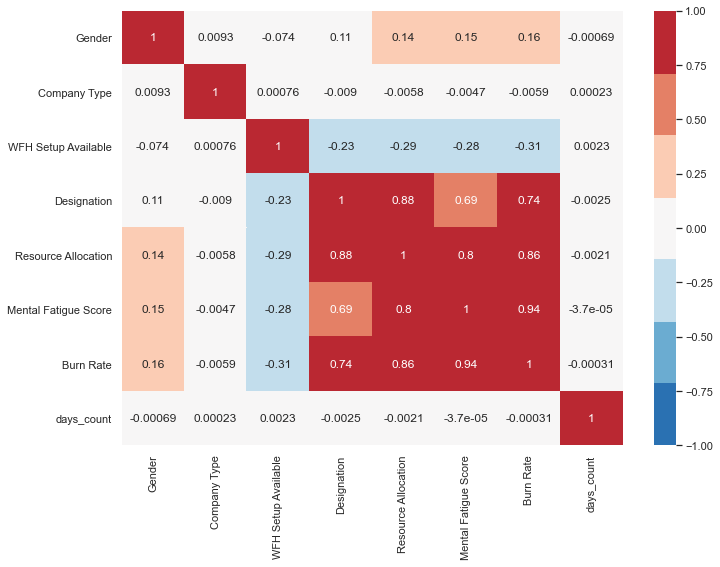

In [75]:
corrCoef(Data_train)

# ML linear regression all variables 

In [77]:
df = Data_train.copy()

In [78]:
df.head()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,days_count
0,0,1,0,2.00,3.00,3.80,0.16,4612
1,1,1,1,1.00,2.00,5.00,0.36,4551
3,1,1,1,1.00,1.00,2.60,0.20,4578
4,0,1,0,3.00,7.00,6.90,0.52,4680
5,1,2,1,2.00,4.00,3.60,0.29,4555


### Define target and non target variables 

- target : Burn Rate 
- No target : All the rest

In [79]:
X = df.drop(['Burn Rate'], axis = 1)
y = df['Burn Rate']


- Split the data in Train and test 

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [81]:
print('Shape of the raw data (X): {}'.format (X.shape))
print('Shape of the TARGET variable (y): {}'.format (y.shape))

print('\nShape of the Train data (X_train): {}'.format (X_train.shape))
print('Shape of the Train data (y_train): {}'.format (y_train.shape))

print('\nShape of the Test data (X_test): {}'.format (X_test.shape))
print('Shape of the TARGET Test data (y_test): {}'.format (y_test.shape))

Shape of the raw data (X): (18590, 7)
Shape of the TARGET variable (y): (18590,)

Shape of the Train data (X_train): (13013, 7)
Shape of the Train data (y_train): (13013,)

Shape of the Test data (X_test): (5577, 7)
Shape of the TARGET Test data (y_test): (5577,)


- Train the model 

In [82]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

- predict y values for the test set

In [83]:
y_pred = regressor.predict(X_test)
y_pred

array([0.59873977, 0.64259679, 0.49479731, ..., 0.13581147, 0.39102513,
       0.43277188])

- predict y values for the train set

In [84]:
y_pred_train = regressor.predict(X_train)
y_pred_train

array([0.36611829, 0.44981205, 0.40751937, ..., 0.22904583, 0.57401462,
       0.24117378])

In [85]:
accuracy = regressor.score(X_test, y_test)
print('Accuracy = '+ str(accuracy))

Accuracy = 0.9205559876172864


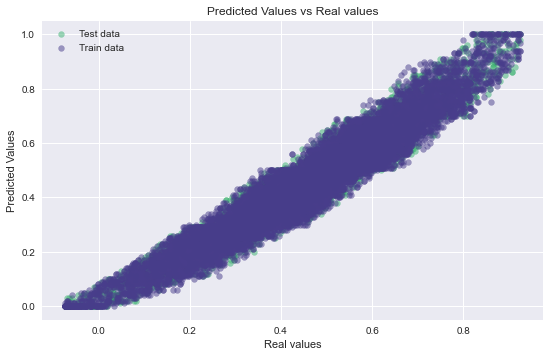

In [86]:
plt.style.use('seaborn')
plt.scatter(y_pred, y_test, color = 'mediumseagreen', marker = 'o', s = 35, alpha = 0.5,
          label = 'Test data')

plt.scatter(y_pred_train, y_train, color = 'darkslateblue', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')

plt.title('Predicted Values vs Real values')
plt.xlabel('Real values')
plt.ylabel('Predicted Values')
plt.legend(loc = 'upper left')
plt.show()

In [87]:
# TEST set
MAE_l = metrics.mean_absolute_error(y_test, y_pred)
MSE_l = metrics.mean_squared_error(y_test, y_pred)
RMSE_l = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
R2_l = r2_score(y_test, y_pred)

print('MAE:', MAE_l)
print('MSE:', MSE_l)
print('RMSE:', round(RMSE_l,3))
print('R2 Score:', R2_l)

MAE: 0.04540984017799577
MSE: 0.0030718618330742836
RMSE: 0.055
R2 Score: 0.9205559876172864


In [88]:
from sklearn.model_selection import cross_val_score
import math

cv_reg_model = LinearRegression() #Let's initialize the method 
cv_scores = cross_val_score(cv_reg_model, X_train, y_train,cv=10, scoring='r2') # Let's define the K and the 

print('Cross Validation R2_score: {}'.format(cv_scores.round(2)))

cv_scores = np.mean(cv_scores).round(3)
print("\nAverage 10-Fold CV R2_score: {}".format(cv_scores))

Cross Validation R2_score: [0.92 0.92 0.92 0.91 0.92 0.92 0.92 0.93 0.93 0.92]

Average 10-Fold CV R2_score: 0.92


In [89]:
# Let's calculate the metrics with our TRAIN dataset
y_predTrain = regressor.predict(X_train)

MAE_lTrain = metrics.mean_absolute_error(y_train, y_predTrain)
MSE_lTrain = metrics.mean_squared_error(y_train,y_predTrain)
RMSE_lTrain = np.sqrt(metrics.mean_squared_error(y_train, y_predTrain))
R2_lTrain = r2_score(y_train, y_predTrain)

print('\n TRAIN metrics\n')
print('MAE:', round(MAE_lTrain,3))
print('MSE:', round(MSE_lTrain,3))
print('RMSE:', round(RMSE_lTrain,3))
print('R2 Score:', round(R2_lTrain,3))

print('\n CV- TRAIN metrics\n')
print('R2 Score:', cv_scores)

print('\n TEST metrics\n')
print('MAE:', round(MAE_l,3))
print('MSE:', round(MSE_l,3))
print('RMSE:', round(RMSE_l,3))
print('R2 Score:', round(R2_l,3))


 TRAIN metrics

MAE: 0.046
MSE: 0.003
RMSE: 0.056
R2 Score: 0.921

 CV- TRAIN metrics

R2 Score: 0.92

 TEST metrics

MAE: 0.045
MSE: 0.003
RMSE: 0.055
R2 Score: 0.921


- To know if our MAE and RMSE have good values we need to compare with the range of the target variable 

In [90]:
df['Burn Rate'].describe()[['min', 'max']].T
#para saber si las metrics estan bien o no, comparar con el rango de la target variable

min   0.00
max   1.00
Name: Burn Rate, dtype: float64

# ML linear regression reduced variables 

- Due to the low correlation between the target variable and Company type and days count we will train droping those variables 

In [91]:
df1 = Data_train.copy()

- Define target and non target variables 

    - Target : Burn Rate 
    - No target : All the rest

In [92]:
X = df1.drop(['Burn Rate', 'Company Type','days_count'], axis = 1)
y = df1['Burn Rate']


- Split the data in Train and test 

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [94]:
print('Shape of the raw data (X): {}'.format (X.shape))
print('Shape of the TARGET variable (y): {}'.format (y.shape))

print('\nShape of the Train data (X_train): {}'.format (X_train.shape))
print('Shape of the Train data (y_train): {}'.format (y_train.shape))

print('\nShape of the Test data (X_test): {}'.format (X_test.shape))
print('Shape of the TARGET Test data (y_test): {}'.format (y_test.shape))

Shape of the raw data (X): (18590, 5)
Shape of the TARGET variable (y): (18590,)

Shape of the Train data (X_train): (13013, 5)
Shape of the Train data (y_train): (13013,)

Shape of the Test data (X_test): (5577, 5)
Shape of the TARGET Test data (y_test): (5577,)


- Train the model 

In [95]:
regressor1 = LinearRegression()
regressor1.fit(X_train, y_train)

LinearRegression()

- predict y values for the test set

In [96]:
y_pred = regressor1.predict(X_test)
y_pred

array([0.59830276, 0.64305281, 0.49433936, ..., 0.13543502, 0.39063711,
       0.43353814])

- predict y values for the train set

In [97]:
y_pred_train = regressor1.predict(X_train)
y_pred_train

array([0.36564784, 0.4504629 , 0.40726267, ..., 0.22948737, 0.57455708,
       0.24096726])

In [98]:
accuracy = regressor1.score(X_test, y_test)
print('Accuracy = '+ str(accuracy))

Accuracy = 0.9205680973735584


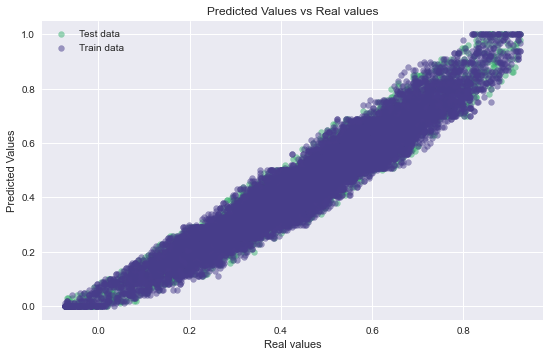

In [99]:
plt.style.use('seaborn')
plt.scatter(y_pred, y_test, color = 'mediumseagreen', marker = 'o', s = 35, alpha = 0.5,
          label = 'Test data')

plt.scatter(y_pred_train, y_train, color = 'darkslateblue', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')

plt.title('Predicted Values vs Real values')
plt.xlabel('Real values')
plt.ylabel('Predicted Values')
plt.legend(loc = 'upper left')
plt.show()

In [100]:
# TEST set
MAE_l = metrics.mean_absolute_error(y_test, y_pred)
MSE_l = metrics.mean_squared_error(y_test, y_pred)
RMSE_l = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
R2_l = r2_score(y_test, y_pred)

print('MAE:', MAE_l)
print('MSE:', MSE_l)
print('RMSE:', round(RMSE_l,3))
print('R2 Score:', R2_l)

MAE: 0.045406444620649786
MSE: 0.0030713935850970697
RMSE: 0.055
R2 Score: 0.9205680973735584


In [101]:
from sklearn.model_selection import cross_val_score
import math

cv_reg_model = LinearRegression() #Let's initialize the method 
cv_scores = cross_val_score(cv_reg_model, X_train, y_train,cv=10, scoring='r2') # Let's define the K and the 

print('Cross Validation R2_score: {}'.format(cv_scores.round(2)))

cv_scores = np.mean(cv_scores).round(3)
print("\nAverage 10-Fold CV R2_score: {}".format(cv_scores))

Cross Validation R2_score: [0.92 0.92 0.92 0.91 0.92 0.92 0.92 0.93 0.93 0.92]

Average 10-Fold CV R2_score: 0.921


In [102]:
# Let's calculate the metrics with our TRAIN dataset
y_predTrain = regressor1.predict(X_train)

MAE_lTrain = metrics.mean_absolute_error(y_train, y_predTrain)
MSE_lTrain = metrics.mean_squared_error(y_train,y_predTrain)
RMSE_lTrain = np.sqrt(metrics.mean_squared_error(y_train, y_predTrain))
R2_lTrain = r2_score(y_train, y_predTrain)

print('\n TRAIN metrics\n')
print('MAE:', round(MAE_lTrain,3))
print('MSE:', round(MSE_lTrain,3))
print('RMSE:', round(RMSE_lTrain,3))
print('R2 Score:', round(R2_lTrain,3))

print('\n CV- TRAIN metrics\n')
print('R2 Score:', cv_scores)

print('\n TEST metrics\n')
print('MAE:', round(MAE_l,3))
print('MSE:', round(MSE_l,3))
print('RMSE:', round(RMSE_l,3))
print('R2 Score:', round(R2_l,3))


 TRAIN metrics

MAE: 0.046
MSE: 0.003
RMSE: 0.056
R2 Score: 0.921

 CV- TRAIN metrics

R2 Score: 0.921

 TEST metrics

MAE: 0.045
MSE: 0.003
RMSE: 0.055
R2 Score: 0.921


- To know if our MAE and RMSE have good values we need to compare with the range of the target variable 

In [103]:
df['Burn Rate'].describe()[['min', 'max']].T
#para saber si las metrics estan bien o no, comparar con el rango de la target variable

min   0.00
max   1.00
Name: Burn Rate, dtype: float64

- Due our metrics, lets try to improve them with another algorithm. 

# ML SVM reduced variables 

In [104]:
# Execute this line (of course, modifying the path)
import sys
sys.path.insert(0, '/Users/dpagniez/Desktop/Functions')

from fx_MLRegression import *

In [105]:
X = df1.drop(['Burn Rate', 'Company Type','days_count'], axis = 1)
y = df1['Burn Rate']


- Split the data in Train and test 

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [107]:
model = SVR(kernel='linear')

model.fit(X_train, y_train)

SVR(kernel='linear')

- To know if our MAE and RMSE have good values we need to compare with the range of the target variable 

In [109]:
df1['Burn Rate'].describe()[['min', 'max']].T
#para saber si las metrics estan bien o no, comparar con el rango de la target variable

min   0.00
max   1.00
Name: Burn Rate, dtype: float64

In [110]:
Allmetrics(model,X_train, y_train,X_test, y_test)
#allmetrics function calcula todas las metrics para train, test y cv train 

,MAE,MSE,RMSE,R2,CV_R2
Train,0.05,0.00,0.06,0.92,0.92
Test,0.05,0.00,0.06,0.92,NaN


- Lets try scaling the data

In [111]:
sc = StandardScaler()
X_std = sc.fit_transform(X)

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, 
                                                    test_size=0.3,
                                                    random_state=0)

In [113]:

model1 = SVR(kernel='linear')

model1.fit(X_train, y_train)

SVR(kernel='linear')

In [114]:
Allmetrics(model1,X_train, y_train,X_test, y_test)
#allmetrics function calcula todas las metrics para train, test y cv train 

,MAE,MSE,RMSE,R2,CV_R2
Train,0.05,0.00,0.06,0.92,0.92
Test,0.05,0.00,0.06,0.92,NaN


### (NO RUN) Hipertune params

In [115]:
#from sklearn.model_selection import GridSearchCV

#param_grid = {'C': [0.01, 0.1, 1, 10, 100], 
#           'gamma': [1, 0.1, 0.01, 0.001], 
#           'kernel': ['rbf', 'poly', 'linear']} 

#param_grid

{'C': [0.01, 0.1, 1, 10, 100],
 'gamma': [1, 0.1, 0.01, 0.001],
 'kernel': ['rbf', 'poly', 'linear']}

In [116]:
#grid = GridSearchCV(SVR(), param_grid, refit=True,
 #                   cv=3, n_jobs = -1)
#refit = True: Refit an estimator using the best found parameters on the whole dataset
# n_jobs = -1: paralell computing
#print(grid)

GridSearchCV(cv=3, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'linear']})


In [118]:
#import time
#start = time.time()

#grid_model = grid.fit(X_train, y_train)

#end = time.time()
#print('Total execution time:', end - start, 'sec')

In [119]:
#grid_model.best_params_

In [120]:
#grid_model.best_score_

In [121]:
#final_model = SVR(C =XXXX, gamma= XXXX, kernel= 'XXXX')

In [122]:
#final_model.fit(X_train,y_train)

In [123]:
#Allmetrics(final_model, X_train, y_train, X_test, y_test)

# ML random forest regressor

In [125]:

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor

In [126]:
X = df1.drop(['Burn Rate', 'Company Type','days_count'], axis = 1)
y = df1['Burn Rate']


In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

### Based model

In [128]:
rfr = RandomForestRegressor()
rfr.fit(X_train , y_train)

RandomForestRegressor()

In [129]:
Allmetrics(rfr, X_train, y_train, X_test, y_test)

,MAE,MSE,RMSE,R2,CV_R2
Train,0.04,0.00,0.05,0.95,0.92
Test,0.05,0.00,0.06,0.92,NaN


In [130]:
print('Parameters currently in use:\n')
print(rfr.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


- lets try to improve our metrics hypertuning some params with CVgrid

### HT model 1 

In [131]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)


{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [132]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [133]:
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [134]:
print(rf_random.best_params_)


{'n_estimators': 1000, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}


In [135]:
rfr_tuned = RandomForestRegressor(n_estimators=1000, min_samples_split=2,
                                  min_samples_leaf=2, max_features='sqrt',
                                  max_depth=10, bootstrap=True)
rfr_tuned.fit(X_train , y_train)

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=2,
                      n_estimators=1000)

In [136]:
Allmetrics(rfr_tuned, X_train, y_train, X_test, y_test)

,MAE,MSE,RMSE,R2,CV_R2
Train,0.04,0.00,0.05,0.94,0.93
Test,0.04,0.00,0.05,0.93,NaN


### HT model 2 

- considering the best params randomly found at  hypertune again the random grid

In [138]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1000, stop = 1400, num = 10)]
# Number of features to consider at every split
max_features = ['sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 20, num = 4)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 4, 6]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2,4,6]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)


{'n_estimators': [1000, 1044, 1088, 1133, 1177, 1222, 1266, 1311, 1355, 1400], 'max_features': ['sqrt'], 'max_depth': [5, 10, 15, 20, None], 'min_samples_split': [2, 4, 6], 'min_samples_leaf': [2, 4, 6], 'bootstrap': [True, False]}


In [139]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random2 = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [140]:
# Fit the random search model
rf_random2.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 15, 20, None],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [2, 4, 6],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [1000, 1044, 1088, 1133,
                                                         1177, 1222, 1266, 1311,
                                                         1355, 1400]},
                   random_state=42, verbose=2)

In [141]:
print(rf_random2.best_params_)


{'n_estimators': 1177, 'min_samples_split': 6, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}


In [142]:
rfr_tuned2 = RandomForestRegressor(n_estimators=1177,min_samples_split=6,
                                   min_samples_leaf=6,max_features='sqrt',
                                   max_depth=10, bootstrap=True)
rfr_tuned2.fit(X_train , y_train)

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=6,
                      min_samples_split=6, n_estimators=1177)

In [143]:
Allmetrics(rfr_tuned2, X_train, y_train, X_test, y_test)

,MAE,MSE,RMSE,R2,CV_R2
Train,0.04,0.00,0.05,0.94,0.93
Test,0.04,0.00,0.05,0.93,NaN


In [144]:
y_pred = rfr_tuned2.predict(X_test)
y_pred

array([0.25744838, 0.3912798 , 0.36528199, ..., 0.38381578, 0.23682092,
       0.37107698])

In [145]:
y_pred_train = rfr_tuned2.predict(X_train)
y_pred_train

array([0.45682906, 0.51029166, 0.30547389, ..., 0.34285043, 0.35497515,
       0.72586622])

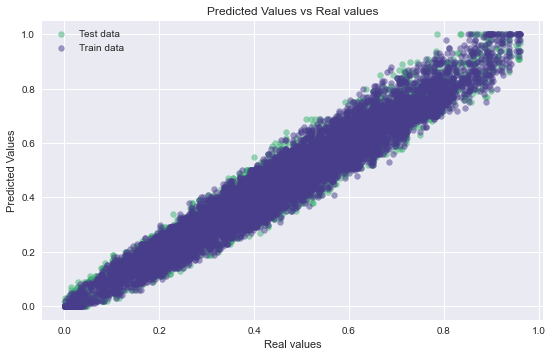

In [146]:
plt.style.use('seaborn')
plt.scatter(y_pred, y_test, color = 'mediumseagreen', marker = 'o', s = 35, alpha = 0.5,
          label = 'Test data')

plt.scatter(y_pred_train, y_train, color = 'darkslateblue', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')

plt.title('Predicted Values vs Real values')
plt.xlabel('Real values')
plt.ylabel('Predicted Values')
plt.legend(loc = 'upper left')
plt.show()

In [147]:
import pickle

In [148]:
# save the model to disk
filename = 'BurnOut_final_model.sav'
pickle.dump(rfr_tuned2, open(filename, 'wb'))

In [149]:
# save the Test dataset 
Data_test.to_csv('Data_test.csv')

In [150]:
## We will try our model with the Test Dataset in another notebook. Please, go to the file 
## "Test Predicting Employees Burning Out"